In [2]:
import os

os.environ['KAGGLE_USERNAME']="mohamedmagdybaioumy"
os.environ['KAGGLE_KEY']="5cb603829d59963059128846de4ad1a5"
!kaggle datasets download -d ananthu017/emotion-detection-fer #copy api

 83% 54.0M/65.2M [00:01<00:00, 58.2MB/s]
100% 65.2M/65.2M [00:01<00:00, 45.7MB/s]


In [3]:
!unzip /content/emotion-detection-fer.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/im37.png      
  inflating: train/sad/im370.png     
  inflating: train/sad/im3700.png    
  inflating: train/sad/im3701.png    
  inflating: train/sad/im3702.png    
  inflating: train/sad/im3703.png    
  inflating: train/sad/im3704.png    
  inflating: train/sad/im3705.png    
  inflating: train/sad/im3706.png    
  inflating: train/sad/im3707.png    
  inflating: train/sad/im3708.png    
  inflating: train/sad/im3709.png    
  inflating: train/sad/im371.png     
  inflating: train/sad/im3710.png    
  inflating: train/sad/im3711.png    
  inflating: train/sad/im3712.png    
  inflating: train/sad/im3713.png    
  inflating: train/sad/im3714.png    
  inflating: train/sad/im3715.png    
  inflating: train/sad/im3716.png    
  inflating: train/sad/im3717.png    
  inflating: train/sad/im3718.png    
  inflating: train/sad/im3719.png    
  inflating: train/sad/im372.png     
  inflating: train/sad/im3720.png    

In [4]:
import keras 

from keras.models import *
from keras.layers import *
from keras.preprocessing import image 
from tensorflow.keras.applications import DenseNet121,ResNet50V2 


import PIL

In [7]:
# Download the architecture of DenseNet121 with ImageNet weights
base_model = DenseNet121(include_top=False, weights='imagenet')
 
x = base_model.output
x = GlobalAveragePooling2D()(x)  # as a faltten 
x = Dense(512, activation='relu')(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss=keras.losses.categorical_crossentropy, optimizer="adam", metrics=['accuracy'])


In [8]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, None, None,   0          ['input_2[0][0]']                
 D)                             3)                                                                
                                                                                                  
 conv1/conv (Conv2D)            (None, None, None,   9408        ['zero_padding2d_2[0][0]']       
                                64)                                                         

In [9]:
# from keras.preprocessing.image import ImageDataGenerator
# main_dir = "/content/emotion-detection-fer.zip"
# train_data = ImageDataGenerator(
#     rescale=1./255,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True)

# test_data = ImageDataGenerator(rescale=1./255)

# train_dir = os.path.join(main_dir, "Train")
# training_set = train_data.flow_from_directory(
#     train_dir,
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='categorical'
# )
# test_dir = os.path.join(main_dir, "Val")
# test_set = test_data.flow_from_directory(
#     test_dir,
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='categorical'
# )
from tensorflow.keras.preprocessing.image import ImageDataGenerator
trdata = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
traindata = trdata.flow_from_directory(directory="/content/train",target_size=(224,224),batch_size=32,class_mode='categorical')
tsdata = ImageDataGenerator(rescale=1./255)
testdata = tsdata.flow_from_directory(directory="/content/test", target_size=(224,224),batch_size=32,class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [14]:
from keras.callbacks import EarlyStopping

In [27]:
results=model.fit_generator(
    traindata,
    steps_per_epoch=32,
    epochs=35,
    validation_data=testdata,
    validation_steps=2,
    callbacks = [EarlyStopping(monitor = 'val_loss', patience = 30)]
)

<ipython-input-27-08dee94f5cdf>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results=model.fit_generator(


Epoch 1/35
32/32 [==============================] - 12s 359ms/step - loss: 1.3399 - accuracy: 0.4961 - val_loss: 1.3392 - val_accuracy: 0.5000
Epoch 2/35
32/32 [==============================] - 12s 359ms/step - loss: 1.3646 - accuracy: 0.4795 - val_loss: 1.1641 - val_accuracy: 0.6094
Epoch 3/35
32/32 [==============================] - 12s 365ms/step - loss: 1.3800 - accuracy: 0.4766 - val_loss: 1.3647 - val_accuracy: 0.4531
Epoch 4/35
32/32 [==============================] - 12s 374ms/step - loss: 1.3137 - accuracy: 0.4863 - val_loss: 1.3557 - val_accuracy: 0.4531
Epoch 5/35
32/32 [==============================] - 12s 368ms/step - loss: 1.3059 - accuracy: 0.4893 - val_loss: 1.3261 - val_accuracy: 0.5156
Epoch 6/35
32/32 [==============================] - 12s 368ms/step - loss: 1.3199 - accuracy: 0.5000 - val_loss: 1.4362 - val_accuracy: 0.4219
Epoch 7/35
32/32 [==============================] - 12s 366ms/step - loss: 1.3643 - accuracy: 0.4775 - val_loss: 1.2575 - val_accuracy: 0.4531

In [25]:
results.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

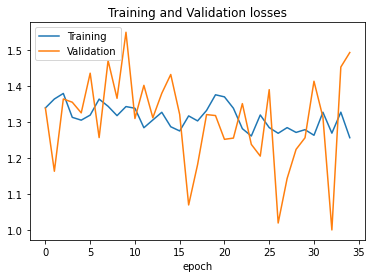

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

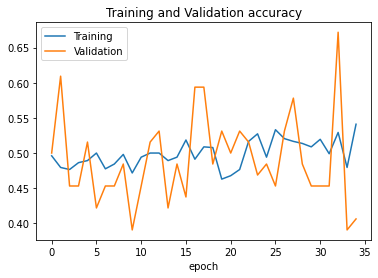

In [29]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')

In [30]:
test_loss, test_acc = model.evaluate(testdata)
print('test loss :{}   test accuracy :{}'.format(test_loss,test_acc))

225/225 [==============================] - 22s 95ms/step - loss: 1.3223 - accuracy: 0.4950
test loss :1.3222696781158447   test accuracy :0.4949846863746643
